# Exploratory Data Analysis

The primary goal of this exploratory data analysis (EDA) is to uncover patterns and relationships within the anime ratings data. Specifically, we aim to:

1. Understand the distribution of ratings given by users and received by anime.
2. Investigate the impact of different factors such as genre, type, number of episodes, and member counts on anime ratings.
3. Examine the relationship between users’ rating behaviors (e.g., average ratings and rating counts).
4. Identify any significant correlations and trends that could provide deeper insights into the factors influencing anime ratings.

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import pingouin

### Loading Data <a id='loading_data'></a>

In [184]:
anime_df = pd.read_csv('data/anime_df.csv', index_col=1)
rating_df = pd.read_csv('data/rating_df.csv', index_col=0)

In [185]:
anime_df.drop(columns=["Unnamed: 0"], inplace=True)

In [186]:
anime_df.head()

,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,Kimi no Na wa.,Movie,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28977,Gintama°,TV,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9253,Steins;Gate,TV,24.0,9.17,673572,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9969,Gintama&#039;,TV,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


### User-based rating distributions

In [188]:
rating_df['rating'].describe()

count    6.337240e+06
mean     7.808497e+00
std      1.572496e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of User Ratings for Animes')

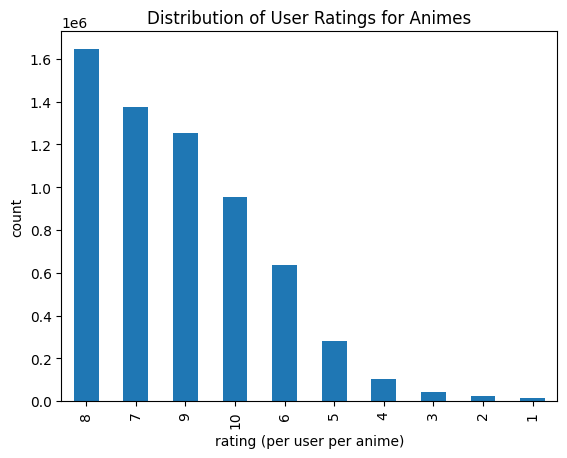

In [189]:
rating_df['rating'].value_counts().plot.bar()
plt.xlabel('rating (per user per anime)')
plt.ylabel('count')
plt.title('Distribution of User Ratings for Animes')

Most users give average of 7-9 rating to animes, both from the perspective of raw distribution count and per user rating average.

### What's the average rating one person give

count    69600.000000
mean         8.227761
std          0.902856
min          1.000000
25%          7.666667
50%          8.193548
75%          8.815789
max         10.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Ratings per User')

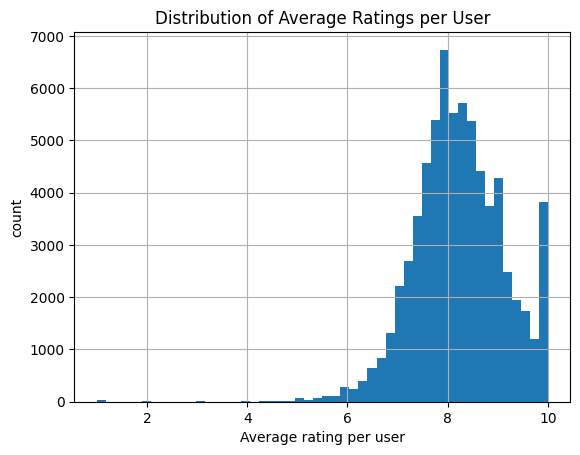

In [190]:
mean_rating_per_user = rating_df.groupby('user_id')['rating'].mean()
print(mean_rating_per_user.describe())

mean_rating_per_user.hist(bins=50)
plt.xlabel('Average rating per user')
plt.ylabel('count')
plt.title('Distribution of Average Ratings per User')

Most people give average ratings between 7-9.

### How many anime does one person rate

count    69600.000000
mean        91.052299
std        135.764253
min          1.000000
25%         13.000000
50%         45.000000
75%        114.000000
max       3747.000000
Name: anime_id, dtype: float64


Text(0.5, 1.0, 'Distribution of Ratings Counts per User')

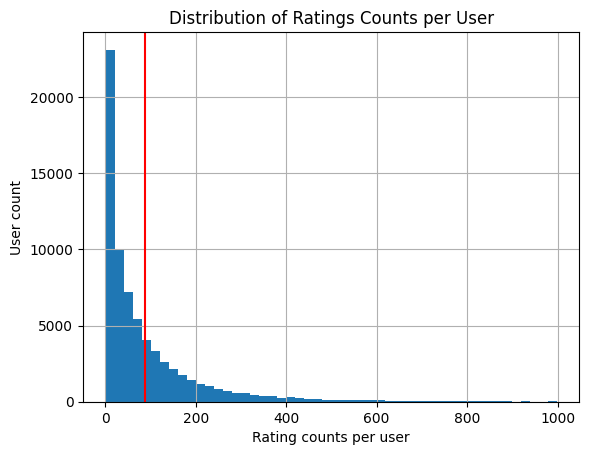

In [191]:
count_per_user = rating_df.groupby('user_id').count()['anime_id']
print(count_per_user.describe())
count_per_user = count_per_user[count_per_user<1000]
count_per_user.hist(bins=50)
plt.axvline(count_per_user.mean(), color='r')
plt.xlabel('Rating counts per user')
plt.ylabel('User count')
plt.title('Distribution of Ratings Counts per User')

We see a wide range of number of ratings a person gives. In average, a user rate 91 animes, and 50% of the users rate 13-114 animes.

### Is there a relationship between user's average rating and user's rating counts

Text(0.5, 1.0, 'Relationship Between User’s Average Rating and Rating Count per User')

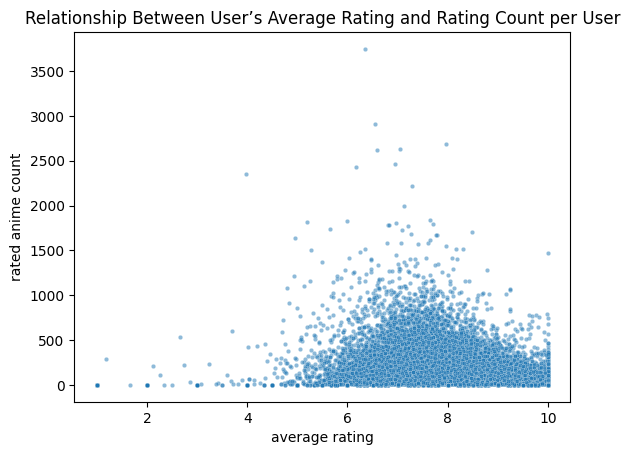

In [192]:
count = rating_df.groupby('user_id').count()
avg_rating = rating_df.groupby('user_id')['rating'].mean()
merged_df = count.merge(avg_rating, on='user_id')
sns.scatterplot(data = merged_df, y='anime_id', x='rating_y', s=10, alpha=0.5)
plt.xlabel('average rating')
plt.ylabel('rated anime count')
plt.title('Relationship Between User’s Average Rating and Rating Count per User')

In [193]:
scipy.stats.pearsonr(merged_df['anime_id'], merged_df['rating_y'])

PearsonRResult(statistic=-0.31144470823219916, pvalue=0.0)

There is a weak negative correlation between the rating and the number of ratings per user. The more anime the user rate, the lower rating they tend to give. 

### What are the rating distirbutions of the animes

count    11869.000000
mean         6.481038
std          1.021649
min          1.670000
25%          5.890000
50%          6.570000
75%          7.190000
max         10.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Average Ratings per Anime')

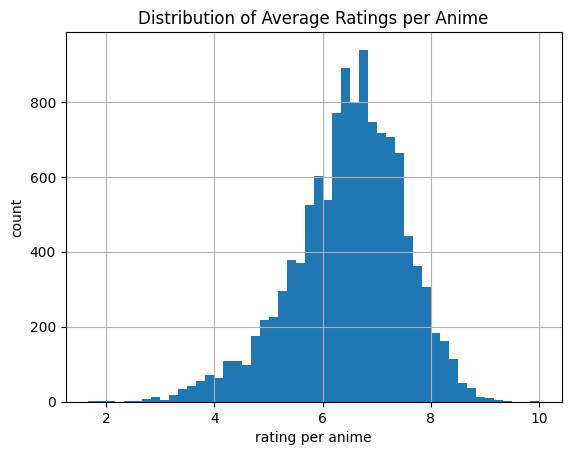

In [194]:
print(anime_df['rating'].describe())
anime_df['rating'].hist(bins=50)
plt.xlabel('rating per anime')
plt.ylabel('count')
plt.title('Distribution of Average Ratings per Anime')

Animes recieves rating of 6.5 in average, where most of the average rating ranges from 5-7.

### How many rating does each anime get

count     9927.000000
mean       638.384205
std       1795.864158
min          1.000000
25%          9.000000
50%         57.000000
75%        395.000000
max      34226.000000
Name: rating, dtype: float64


Text(0.5, 1.0, 'Distribution of Ratings Counts per Anime')

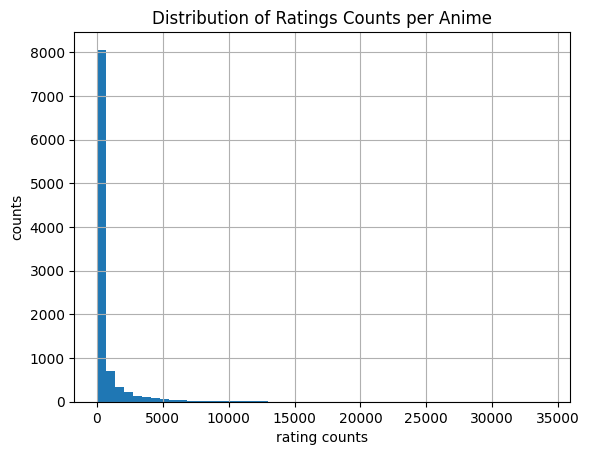

In [195]:
rating_count_per_anime = rating_df.groupby('anime_id').count()['rating']
print(rating_count_per_anime.describe())
rating_count_per_anime.hist(bins=50)
plt.xlabel('rating counts')
plt.ylabel('counts')
plt.title('Distribution of Ratings Counts per Anime')

There is a wide range for how many rating each anime gets. The average is 638, and 50% of the animes get 9-395 ratings.

Text(0.5, 1.0, 'Distribution of Ratings Counts per Anime (log)')

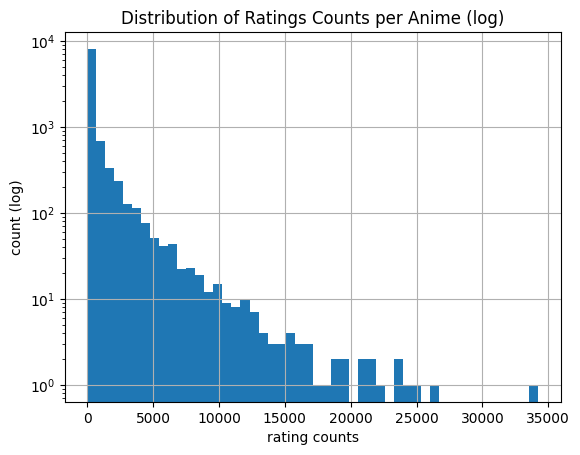

In [196]:
rating_count_per_anime.hist(bins=50)
plt.yscale('log')
plt.xlabel('rating counts')
plt.ylabel('count (log)')
plt.title('Distribution of Ratings Counts per Anime (log)')

### Is there a relationship between anime's average rating and anime's rating counts

Text(0.5, 1.0, "Relationship Between Anime's Average Rating and Rating Count per Anime")

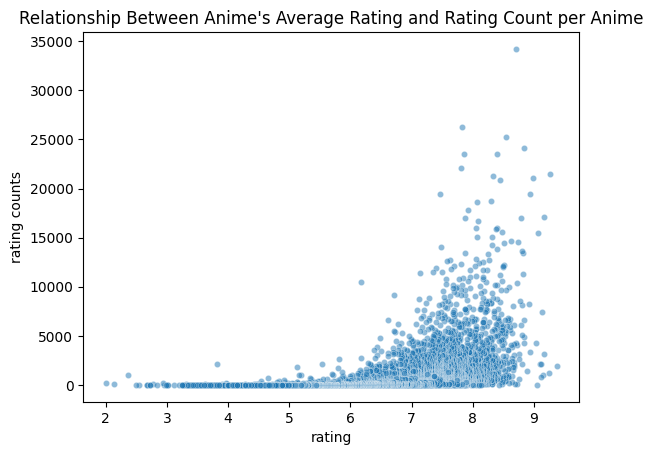

In [197]:
rating_count_per_anime
anime_df_merged = anime_df.merge(rating_count_per_anime, on='anime_id')
sns.scatterplot(data=anime_df_merged, x='rating_x', y='rating_y', s=20, alpha=0.5)
plt.xlabel('rating')
plt.ylabel('rating counts')
plt.title("Relationship Between Anime's Average Rating and Rating Count per Anime")

In [198]:
scipy.stats.pearsonr(anime_df_merged['rating_x'], anime_df_merged['rating_y'])

PearsonRResult(statistic=0.400690112560548, pvalue=0.0)

There is a weak positive correlation between the rating and the number of ratings per anime. The more rating an anime recieves, the higher rating they tend to get. 

### Does anime type affect the rating?

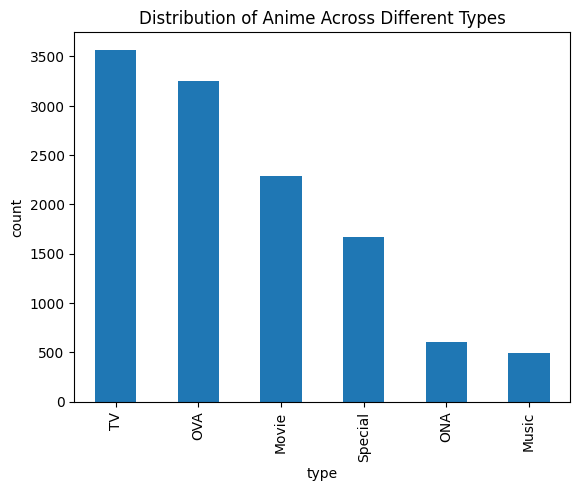

In [199]:
anime_df['type'].value_counts().plot.bar()
plt.xlabel('type')
plt.ylabel('count')
plt.title('Distribution of Anime Across Different Types')
plt.show()

Text(0, 0.5, 'rating')

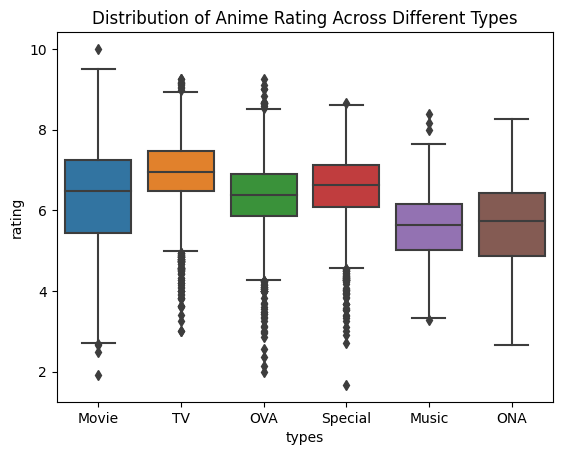

In [200]:
sns.boxplot(x='type', y='rating', data=anime_df)
plt.title('Distribution of Anime Rating Across Different Types')
plt.xlabel('types')
plt.ylabel('rating')

In [201]:
anova_results = pingouin.anova(data=anime_df,
                               dv="rating",
                               between="type")
anova_results

,Source,ddof1,ddof2,F,p-unc,np2
0,type,5,11863,362.475092,0.0,0.132528


Based on the anova result, the anime type has a signiticant impact for rating. The p-unc value suggest that the difference in each type's mean rating is statistically significant, and the large value of F supports that there are larger variance across the types than with in the types.

### Does anime genre affect the rating?

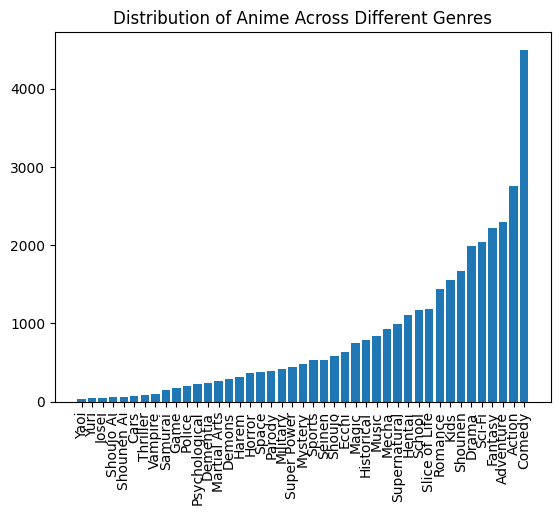

In [202]:
genres = anime_df.drop(columns=['type', 'episodes', 'rating', 'members', 'name'])
sum = genres.sum().sort_values()
plt.bar(x=sum.index, height=sum)
plt.xticks(rotation=90)
plt.title('Distribution of Anime Across Different Genres')
plt.show()

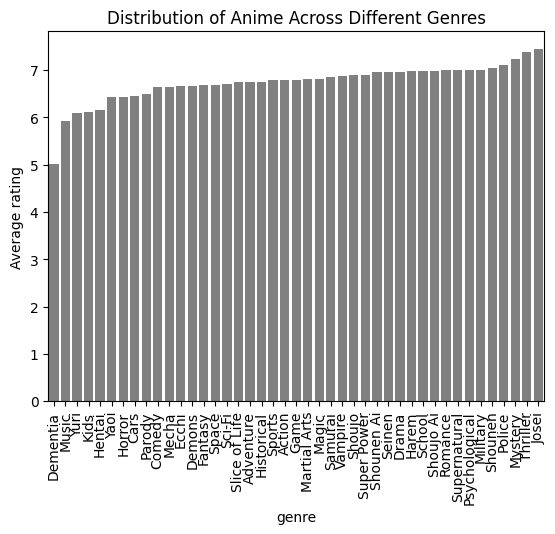

In [203]:
genre_and_rating = anime_df.drop(columns=['type', 'episodes', 'members', 'name'])

genre_avg_rating = []
for i in range(len(genres.columns)):    
    rating = genre_and_rating[genre_and_rating[genres.columns[i]] == 1]['rating']
    genre_avg_rating.append(rating.mean())

genre_avg_rating_df = pd.DataFrame({'genre': genres.columns, 'avg_rating': genre_avg_rating}).sort_values(by='avg_rating')

sns.barplot(data=genre_avg_rating_df, x='genre', y='avg_rating', color='grey')
plt.xticks(rotation=90)
plt.ylabel('Average rating')
plt.title('Distribution of Anime Across Different Genres')
plt.show()

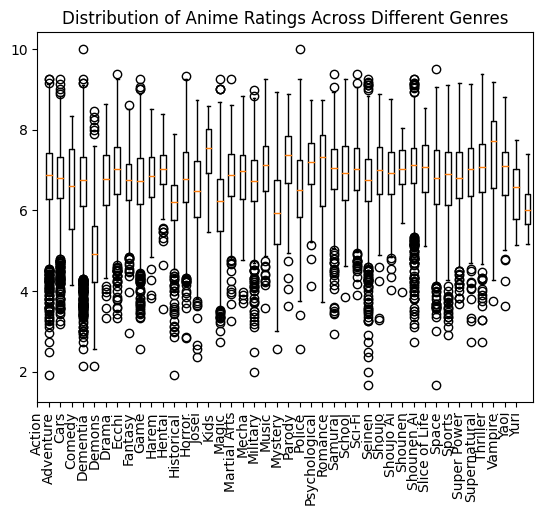

In [204]:
genre_ratings = []
for i in range(len(genres.columns)):    
    rating = genre_and_rating[genre_and_rating[genres.columns[i]] == 1]['rating']
    genre_ratings.append(rating)

plt.boxplot(genre_ratings)
plt.xticks(range(len(genres.columns)),genres.columns)
plt.xticks(rotation=90)
plt.title('Distribution of Anime Ratings Across Different Genres')
plt.show()


In [205]:
from statsmodels.formula.api import ols

# Reshape the dataframe for ANOVA
melted_df = genre_and_rating.melt(id_vars=['rating'],value_vars=genres.columns, value_name='is_genre', var_name='genre')
anova_results = pingouin.anova(data=melted_df[melted_df['is_genre'] == 1], dv="rating", between="genre")
anova_results


,Source,ddof1,ddof2,F,p-unc,np2
0,genre,42,35263,90.641355,0.0,0.097439


Based on the anova result, the genre has a signiticant impact for rating. The p-unc value suggest that the difference in each type's mean rating is statistically significant, and the large value of F supports that there are larger variance across the genres than with in the genres.

### Does anime episodes affect the rating?

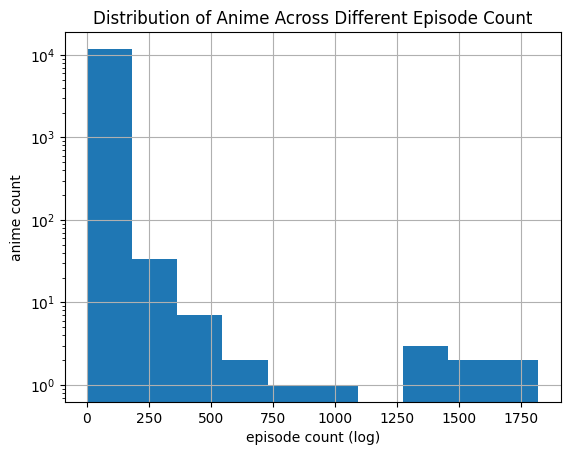

In [206]:
anime_df['episodes'].hist()
plt.yscale('log')
plt.xlabel('episode count (log)')
plt.ylabel('anime count')
plt.title('Distribution of Anime Across Different Episode Count')
plt.show()

Text(0.5, 1.0, 'Relationships between rating and epidoes')

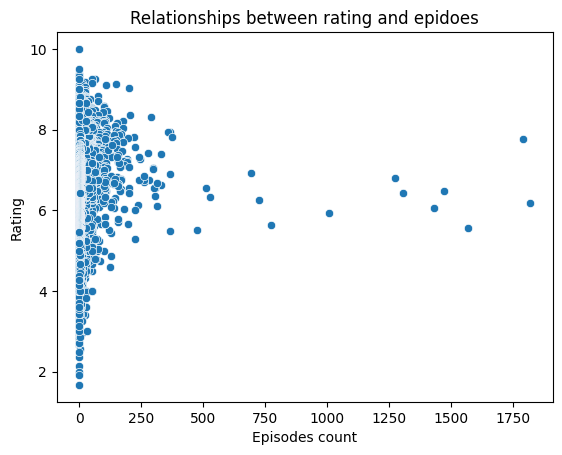

In [207]:
sns.scatterplot(data=anime_df, x='episodes', y='rating')
plt.xlabel('Episodes count')
plt.ylabel('Rating')
plt.title('Relationships between rating and epidoes')

In [208]:
scipy.stats.pearsonr(anime_df['episodes'], anime_df['rating'])

PearsonRResult(statistic=0.0886531364214489, pvalue=3.8004285032201785e-22)

Based on the Person correlation coeffecient value, there is very little positive correlation between rating and episodes.

### Does anime members affect rating

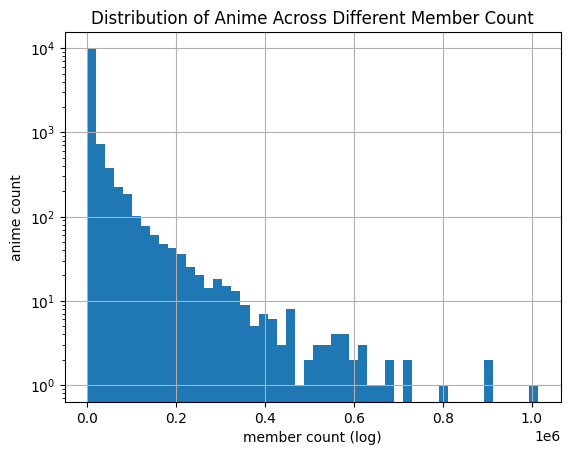

In [213]:
anime_df['members'].hist(bins=50)
plt.yscale('log')
plt.xlabel('member count (log)')
plt.ylabel('anime count')
plt.title('Distribution of Anime Across Different Member Count')
plt.show()

Text(0.5, 1.0, 'Relationships between rating and members')

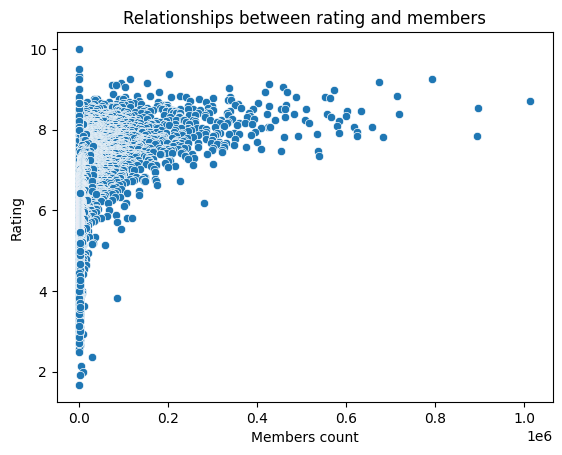

In [214]:
sns.scatterplot(data=anime_df, x='members', y='rating')
plt.xlabel('Members count')
plt.ylabel('Rating')
plt.title('Relationships between rating and members')

In [215]:
scipy.stats.pearsonr(anime_df['episodes'], anime_df['rating'])

PearsonRResult(statistic=0.0886531364214489, pvalue=3.8004285032201785e-22)

Based on the Person correlation coeffecient value, there is very little positive correlation between rating and members.

### Relationships among multiple features

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


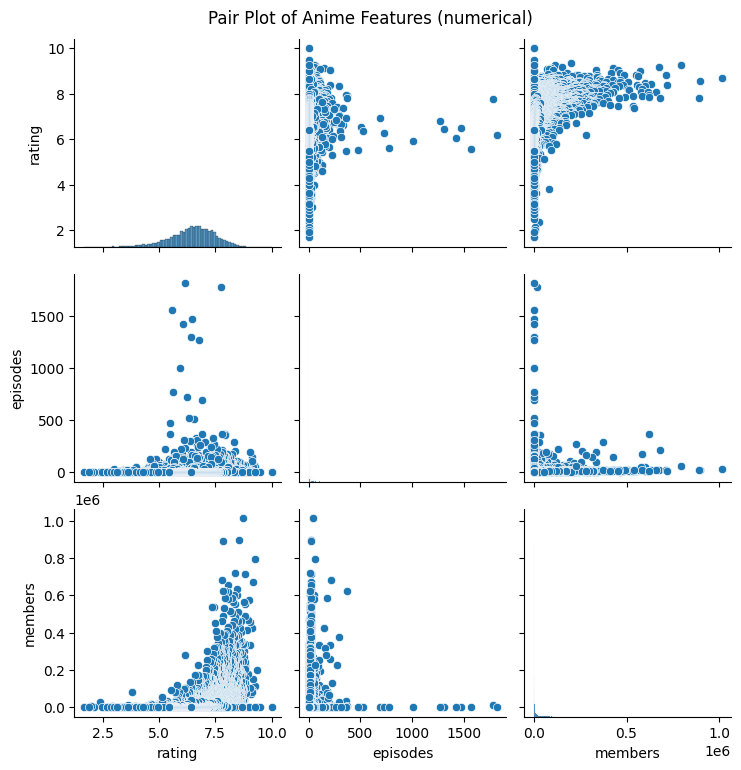

In [216]:
sns.pairplot(anime_df[['rating', 'episodes', 'members']])
plt.suptitle('Pair Plot of Anime Features (numerical)', y=1.02)
plt.show()

### PCA

In [217]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [218]:
# Convert type into dummy_data
type_dummy = pd.get_dummies(anime_df['type'], dtype='int') 
type_dummy.rename(columns={'Music': 'Music_Type'}, inplace=True)
anime_df_dummies = anime_df.merge(type_dummy, on='anime_id')
anime_df_dummies.head()

,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music_Type,ONA,OVA,Special,TV
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,Kimi no Na wa.,Movie,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
28977,Gintama°,TV,51.0,9.25,114262,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9253,Steins;Gate,TV,24.0,9.17,673572,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9969,Gintama&#039;,TV,51.0,9.16,151266,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [219]:
# Save anime df with type dummies to file
anime_df_dummies.to_csv('data/anime_df_dummies.csv', sep=',')

In [220]:
genre_and_rating = anime_df_dummies.drop(columns=['type', 'episodes', 'members', 'name', 'rating'])
pca = PCA().fit(genre_and_rating)
print(pca.explained_variance_ratio_)
print(pca.get_feature_names_out())

[1.09682631e-01 8.97293959e-02 7.49934001e-02 6.71149793e-02
 6.05170598e-02 4.94365853e-02 4.49854323e-02 4.13798611e-02
 3.58363762e-02 3.28689146e-02 2.98994614e-02 2.75726408e-02
 2.69992255e-02 2.58695136e-02 2.31708176e-02 1.97469284e-02
 1.82251109e-02 1.75319889e-02 1.70823736e-02 1.53943304e-02
 1.49860101e-02 1.39970228e-02 1.20900196e-02 1.15763953e-02
 1.05779831e-02 1.01125231e-02 9.79324460e-03 9.30221247e-03
 8.69109958e-03 8.01279575e-03 6.75972618e-03 6.30329168e-03
 6.11783237e-03 5.64794155e-03 5.32608892e-03 5.02904534e-03
 4.34044309e-03 4.06166353e-03 3.98466865e-03 3.15061944e-03
 2.35512402e-03 1.94507305e-03 1.70726634e-03 1.53412881e-03
 1.34967476e-03 1.27638298e-03 1.01434061e-03 9.20355758e-04
 9.33789487e-30]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' '

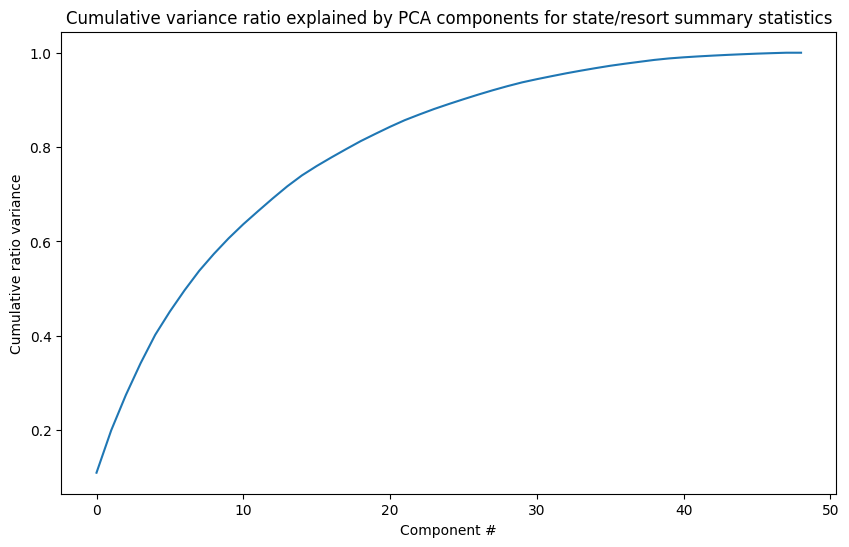

In [221]:
plt.subplots(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

### Regression

In [222]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [223]:
# Simple Linear Regression

X = anime_df['members']  
y = anime_df['rating'] 

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model_simple = sm.OLS(y_train, X_train).fit()

model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     1562.
Date:                Tue, 28 May 2024   Prob (F-statistic):          6.06e-315
Time:                        09:09:30   Log-Likelihood:                -12133.
No. Observations:                8901   AIC:                         2.427e+04
Df Residuals:                    8899   BIC:                         2.428e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3467      0.011    600.797      0.000       6.326       6.367
members     7.163e-06   1.81e-07     39.526      0.000    6.81e-06    7.52e-06
==============================================================================
Omnibus:                      874.599   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.653
Skew:                          -0.770   Prob(JB):                    5.93e-273
Kurtosis:                       4.005   Cond. No.                     6.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'predicted values')

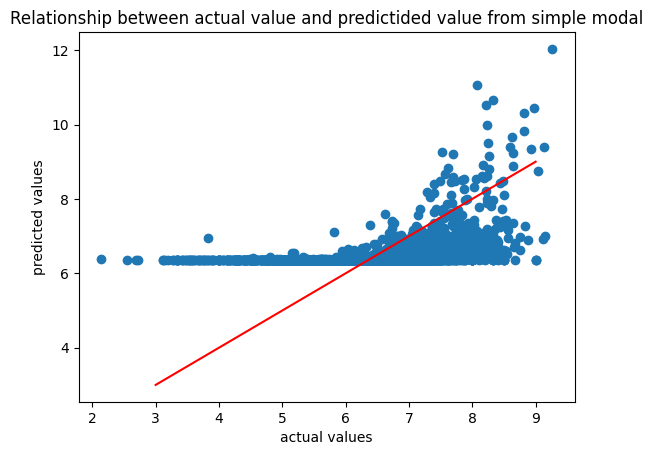

In [224]:
# Compaire the actual test value and the predicted value
y_pred = model_simple.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(3,10)],[x for x in range(3,10)], color='red')
plt.title('Relationship between actual value and predictided value from simple modal')
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [225]:
# Multiple Linear Regression

X = anime_df[['members', 'episodes']]  
y = anime_df['rating']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model_multiple = sm.OLS(y_train, X_train).fit()

model_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     828.4
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        09:09:32   Log-Likelihood:                -12038.
No. Observations:                8901   AIC:                         2.408e+04
Df Residuals:                    8898   BIC:                         2.410e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3212      0.011    581.126      0.000       6.300       6.342
members     7.009e-06    1.8e-07     38.855      0.000    6.66e-06    7.36e-06
episodes       0.0025      0.000      8.954      0.000       0.002       0.003
==============================================================================
Omnibus:                      858.079   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1233.027
Skew:                          -0.757   Prob(JB):                    1.78e-268
Kurtosis:                       4.017   Cond. No.                     6.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'predicted values')

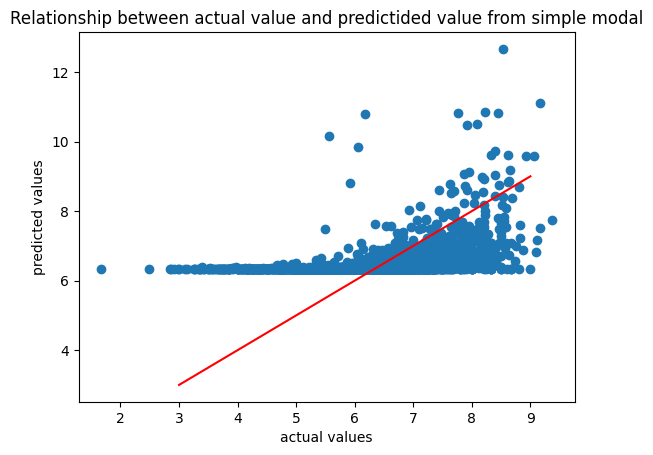

In [226]:
# Compaire the actual test value and the predicted value
y_pred = model_multiple.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(3,10)],[x for x in range(3,10)], color='red')
plt.title('Relationship between actual value and predictided value from simple modal')
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [227]:
# Regression with categorical variables

X = anime_df_dummies.drop(columns=['name', 'type', 'rating'])
y = anime_df_dummies['rating']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model_with_category = sm.OLS(y_train, X_train).fit()

model_with_category.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 28 May 2024   Prob (F-statistic):               0.00
Time:                        09:09:36   Log-Likelihood:                -10766.
No. Observations:                8901   AIC:                         2.163e+04
Df Residuals:                    8850   BIC:                         2.200e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9881      0.021    239.287      0.000       4.947       5.029
episodes          0.0009      0.000      3.793      0.000       0.000       0.001
members        4.535e-06   1.77e-07     25.591      0.000    4.19e-06    4.88e-06
Action            0.0723      0.024      2.954      0.003       0.024       0.120
Adventure         0.1592      0.024      6.519      0.000       0.111       0.207
Cars             -0.0565      0.113     -0.502      0.615      -0.277       0.164
Comedy            0.1245      0.021      5.952      0.000       0.084       0.166
Dementia         -0.9618      0.062    -15.518      0.000      -1.083      -0.840
Demons           -0.0646      0.059     -1.090      0.276      -0.181       0.052
Drama             0.4069      0.025     15.993      0.000       0.357       0.457
Ecchi            -0.1329      0.042     -3.193      0.001      -0.215      -0.051
Fantasy           0.1817      0.025      7.356      0.000       0.133       0.230
Game              0.0530      0.076      0.699      0.484      -0.096       0.201
Harem             0.0751      0.059      1.269      0.204      -0.041       0.191
Hentai            0.1160      0.040      2.931      0.003       0.038       0.194
Historical        0.2157      0.037      5.766      0.000       0.142       0.289
Horror           -0.1399      0.053     -2.623      0.009      -0.244      -0.035
Josei             0.5717      0.131      4.367      0.000       0.315       0.828
Kids             -0.1727      0.028     -6.124      0.000      -0.228      -0.117
Magic             0.1014      0.038      2.659      0.008       0.027       0.176
Martial Arts      0.0712      0.061      1.166      0.244      -0.048       0.191
Mecha             0.0167      0.038      0.435      0.664      -0.059       0.092
Military          0.3175      0.050      6.333      0.000       0.219       0.416
Music             0.0926      0.053      1.756      0.079      -0.011       0.196
Mystery           0.3956      0.047      8.375      0.000       0.303       0.488
Parody            0.1269      0.050      2.530      0.011       0.029       0.225
Police            0.3924      0.071      5.507      0.000       0.253       0.532
Psychological     0.1114      0.065      1.702      0.089      -0.017       0.240
Romance           0.1392      0.030      4.578      0.000       0.080       0.199
Samurai           0.0538      0.080      0.670      0.503      -0.104       0.211
School            0.2480      0.032      7.744      0.000       0.185       0.311
Sci-Fi            0.1207      0.028      4.292      0.000       0.066       0.176
Seinen            0.2902      0.044      6.630      0.000       0.204       0.376
Shoujo            0.2143      0.042      5.050      0.000       0.131       0.298
Shoujo Ai         0.2633      0.125      2.112   

Text(0, 0.5, 'predicted values')

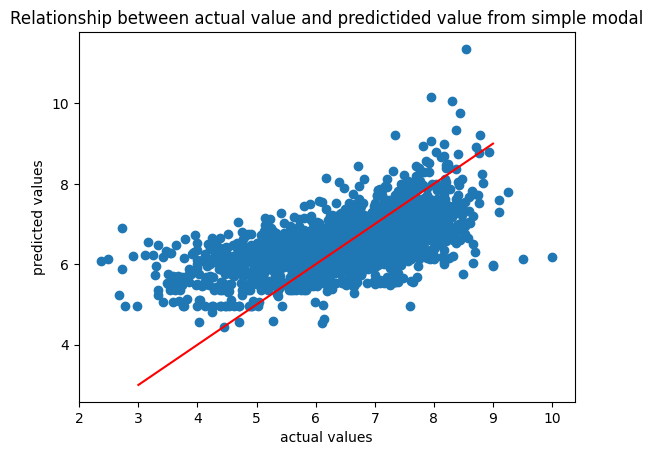

In [228]:
# Compaire the actual test value and the predicted value
y_pred = model_with_category.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(3,10)],[x for x in range(3,10)], color='red')
plt.title('Relationship between actual value and predictided value from simple modal')
plt.xlabel('actual values')
plt.ylabel('predicted values')

### Summary

Based on the analysis, we see a weak positive correlation between the average rating and the number of ratings per anime. The more rating an anime recieves, the higher rating they tend to recieve.

We also found that anime types and genres has affect on the ratings.